In [5]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pwd

'/Users/alexander.fioto/github/pytorch/PYTORCH_NOTEBOOKS/02-ANN-Artificial-Neural-Networks'

In [7]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')

In [8]:
df.head(3)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2


In [9]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [10]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [11]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [12]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321
...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,5.751348
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,5.767444
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,5.052523
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,1.208923


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
my_time = df['pickup_datetime'][0]

In [15]:
my_time.hour

8

In [16]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [17]:
df['Hour'] = df['EDTdate'].dt.hour

In [18]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [19]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [20]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [21]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
             'dropoff_latitude', 'passenger_count', 'dist_km']


In [22]:
y_col = ['fare_amount']

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [24]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [25]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [31]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [32]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [33]:
hr = df['Hour'].cat.codes.values
ampm = df["AMorPM"].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [34]:
cats = np.stack([hr, ampm, wkdy], axis=1)

In [35]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [36]:
# One liner boom
cats = np.stack([df[cat_col].cat.codes.values for cat_col in cat_cols], 1)

In [37]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [38]:
cats = torch.tensor(cats, dtype = torch.int64)

In [39]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [40]:
conts = torch.tensor(conts, dtype = torch.float)

In [41]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [42]:
y = torch.tensor(df[y_col].values, dtype=torch.float) # .reshape(-1, 1) need column shape

In [43]:
cats.shape

torch.Size([120000, 3])

In [44]:
conts.shape

torch.Size([120000, 6])

In [45]:
y.shape

torch.Size([120000, 1])

In [46]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [47]:
cat_szs

[24, 2, 7]

In [48]:
emb_szs = [(size, min(50, (size +1)//2)) for size in cat_szs]

In [49]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

# Part 3

In [50]:
catz = cats[:2]

In [51]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [52]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [53]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [54]:
embeddingz = []
for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:, i]))

In [55]:
embeddingz

[tensor([[-1.0723, -0.7055,  1.5988, -0.9451,  0.8686, -1.4376,  0.9151,  1.6031,
           0.7967,  0.1033, -0.2751,  0.7561],
         [-1.2602,  0.0204, -0.5675,  0.1310, -0.5128, -0.8600, -0.0084,  0.3524,
           0.7877,  1.5390, -1.4789, -0.6639]], grad_fn=<EmbeddingBackward>),
 tensor([[0.5311],
         [0.5311]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.1237,  0.2423, -0.5420, -0.1574],
         [-0.4301,  1.7057,  1.2753,  1.2404]], grad_fn=<EmbeddingBackward>)]

In [56]:
z = torch.cat(embeddingz, 1)

In [57]:
z

tensor([[-1.0723, -0.7055,  1.5988, -0.9451,  0.8686, -1.4376,  0.9151,  1.6031,
          0.7967,  0.1033, -0.2751,  0.7561,  0.5311, -0.1237,  0.2423, -0.5420,
         -0.1574],
        [-1.2602,  0.0204, -0.5675,  0.1310, -0.5128, -0.8600, -0.0084,  0.3524,
          0.7877,  1.5390, -1.4789, -0.6639,  0.5311, -0.4301,  1.7057,  1.2753,
          1.2404]], grad_fn=<CatBackward>)

In [58]:
selfembdrop = nn.Dropout(0.4)

In [59]:
z = selfembdrop(z)

In [60]:
z

tensor([[-1.7871, -1.1758,  2.6647, -1.5751,  0.0000, -2.3960,  1.5251,  0.0000,
          0.0000,  0.1722, -0.0000,  1.2601,  0.0000, -0.2061,  0.0000, -0.0000,
         -0.2623],
        [-2.1004,  0.0340, -0.9459,  0.2183, -0.8547, -0.0000, -0.0139,  0.5874,
          0.0000,  2.5650, -0.0000, -0.0000,  0.8851, -0.7168,  2.8429,  0.0000,
          2.0673]], grad_fn=<MulBackward0>)

In [61]:
sum([nf for ni, nf in emb_szs])

17

In [81]:
class TabularModel(nn.Module):
    
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        
        # layers = [200, 100, 50] play around.
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))
            
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [82]:
torch.manual_seed(33)
model = TabularModel(emb_szs=emb_szs, 
                     n_cont=conts.shape[1], 
                     out_sz=1, 
                     layers=[200,100], 
                     p=0.4)

In [83]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [84]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [85]:
batch_size = 60000
test_size = int(batch_size * 0.2)

In [86]:
# Data shuffled already
cat_train = cats[:batch_size-test_size]
cat_test =  cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [87]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [88]:
len(cat_train)

48000

In [89]:
len(con_train)

48000

In [90]:
len(cat_test)

12000

In [91]:
import time
start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) #RMSE
    losses.append(loss)
    
    if i %10 ==1:
        print(f'Epoch: {i} loss is {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

Epoch: 1 loss is 12.586901664733887
Epoch: 11 loss is 11.686633110046387
Epoch: 21 loss is 11.121231079101562
Epoch: 31 loss is 10.733573913574219
Epoch: 41 loss is 10.460501670837402
Epoch: 51 loss is 10.234914779663086
Epoch: 61 loss is 10.028059959411621
Epoch: 71 loss is 9.849145889282227
Epoch: 81 loss is 9.63514232635498
Epoch: 91 loss is 9.41346549987793
Epoch: 101 loss is 9.172791481018066
Epoch: 111 loss is 8.894432067871094
Epoch: 121 loss is 8.57850456237793
Epoch: 131 loss is 8.2166166305542
Epoch: 141 loss is 7.807923793792725
Epoch: 151 loss is 7.365131855010986
Epoch: 161 loss is 6.919440269470215
Epoch: 171 loss is 6.457106113433838
Epoch: 181 loss is 5.966923236846924
Epoch: 191 loss is 5.461111545562744
Epoch: 201 loss is 5.016819953918457
Epoch: 211 loss is 4.630730628967285
Epoch: 221 loss is 4.340976238250732
Epoch: 231 loss is 4.097596645355225
Epoch: 241 loss is 3.9071192741394043
Epoch: 251 loss is 3.8835806846618652
Epoch: 261 loss is 3.799222707748413
Epoch: 2

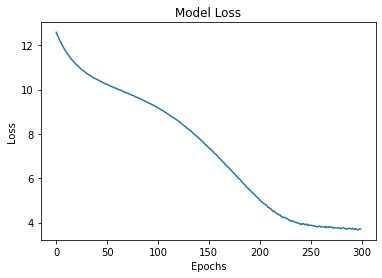

In [93]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss');

In [94]:
with torch.no_grad():
    
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
    

In [95]:
loss

tensor(3.6358)

In [104]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFF: {diff:8.2f}')

0.) PREDICTED:     5.57 TRUE:     2.90 DIFF:     2.67
1.) PREDICTED:    13.28 TRUE:     5.70 DIFF:     7.58
2.) PREDICTED:     8.13 TRUE:     7.70 DIFF:     0.43
3.) PREDICTED:    14.65 TRUE:    12.50 DIFF:     2.15
4.) PREDICTED:     7.05 TRUE:     4.10 DIFF:     2.95
5.) PREDICTED:     6.13 TRUE:     5.30 DIFF:     0.83
6.) PREDICTED:     2.04 TRUE:     3.70 DIFF:     1.66
7.) PREDICTED:    18.85 TRUE:    14.50 DIFF:     4.35
8.) PREDICTED:     5.27 TRUE:     5.70 DIFF:     0.43
9.) PREDICTED:    13.90 TRUE:    10.10 DIFF:     3.80


In [105]:
torch.save(model.state_dict(), 'TaxiModel.pt')